<a href="https://colab.research.google.com" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# Ammended feeding for DKT: Applications of Deep Neural Networks

**Module 1: Embedding layer for Deep Knowledge Tracing**
* Researcher: [Jose Naranjo](https://www.linkedin.com/in/jolunavi1/)

## Google CoLab Instructions

The following code ensures that Google CoLab is running the correct version of TensorFlow.

In [ ]:
try:
    %tensorflow_version 2.x
    COLAB = True
    print("Note: using Google CoLab")
except:
    print("Note: not using Google CoLab")
    COLAB = False

# Embedding Layers in Keras



[Embedding Layers](https://keras.io/layers/embeddings/) are a handy feature of Keras that allows the program to automatically insert additional information into the data flow of your neural network. Word2Vec can expand words to any dimension vector, for example 300 dimensions. An embedding layer would automatically allow you to insert these 300-dimension vectors in the place of word indexes.  

Programmers often use embedding layers with Natural Language Processing (NLP); however, you can use these layers when you wish to insert a lengthier vector in an index value place. In some ways, you can think of an embedding layer as dimension expansion or reduction. However, the hope is that these additional/reduced dimensions provide more information to the model and provide a better score.


## Simple Embedding Layer Example


* **input_dim** = How large is the vocabulary?  How many categories are you encoding? This parameter is the number of items in your "lookup table."
* **output_dim** = How many numbers in the vector you wish to return? Number of dimentions to be used.
* **input_length** = How many items are in the input feature vector that you need to transform?

Now we create a neural network with a vocabulary size of 10, which will reduce those values TO 10 number vectors. This neural network does nothing more than passing the embedding on to the output. But it does let us see what the embedding is doing. Each feature vector coming in will have two such features.
The given output shows that we provided the program with two rows from the one-hot encoding table. 

The following section demonstrates how to train this embedding lookup table.

## Data preprocessing stage

First, we make use of the following libraries.

In [24]:



from tensorflow.keras.preprocessing.text import one_hot
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Embedding, Dense
from keras.preprocessing.sequence import TimeseriesGenerator


In [30]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from numpy import array
from tensorflow.keras.preprocessing.text import one_hot
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Embedding, Dense
from keras.preprocessing.sequence import TimeseriesGenerator
from keras.models import Model

We create a neural network that classifies restaurant reviews according to positive or negative.  This neural network can accept strings as input, such as given here.  This code also includes positive or negative labels for each review.

In [32]:
#####jolunavi
df = pd.read_csv('preguntas_estudent_1261.csv')

In [34]:
#####jolunavi
preguntas_pre = df['Question'].to_numpy()
respuestas = df['Answer'].to_numpy()

In [38]:
#####jolunavi
d_codigos = {} #This dictionary will let us find the question in the original data set
l_preguntas = list() #contains the list of the questions that student answered with a different numbering format
new_id = 1
for item in preguntas_pre:
    if item not in d_codigos.keys():
        d_codigos[item] = new_id
        new_id += 1 
    l_preguntas.append(d_codigos[item])
preguntas = np.array(l_preguntas)    

In [40]:
preguntas


array([ 1,  2,  2, ..., 51, 55, 47])

The **pregunas** and **respuestas** variables are arrays of 1261 elements each, the questions variable has the new tags for each question that starts with 1 and ends on 71 (different number of questions contained).

The **skills_dic** variable contains an oredered dictionary, whose keys starts on 1 to n and the values contains the description of the skill as they are in the original ASSISTment dataset.

In [43]:
#####jolunavi
sorted_skills = pd.read_csv('data/assist2009_skills.txt', delimiter = "\t", names=["ID", "Skill"] ).sort_values(by=["ID"])
skills_dic = sorted_skills.set_index('ID')['Skill'].to_dict()

In [42]:
skills_dic

{1: 'Area Trapezoid',
 2: 'Area Irregular Figure',
 3: 'Probability of Two Distinct Events',
 4: 'Table',
 5: 'Median',
 6: 'Stem and Leaf Plot',
 7: 'Mode',
 8: 'Mean',
 9: 'Range',
 10: 'Venn Diagram',
 11: 'Histogram as Table or Graph',
 12: 'Circle Graph',
 13: 'Equivalent Fractions',
 14: 'Proportion',
 15: 'Fraction Of',
 16: 'Probability of a Single Event',
 17: 'Scatter Plot',
 18: 'Addition and Subtraction Positive Decimals',
 19: 'Multiplication Fractions',
 20: 'Addition and Subtraction Integers',
 21: 'Multiplication and Division Integers',
 22: 'Addition Whole Numbers',
 23: 'Absolute Value',
 24: 'Addition and Subtraction Fractions',
 25: 'Subtraction Whole Numbers',
 26: 'Equation Solving Two or Fewer Steps',
 27: 'Order of Operations +,-,/,* () positive reals',
 28: 'Calculations with Similar Figures',
 29: 'Counting Methods',
 30: 'Ordering Fractions',
 31: 'Circumference ',
 32: 'Box and Whisker',
 33: 'Ordering Integers',
 34: 'Conversion of Fraction Decimals Percent

In [45]:
#here we match the new skill tag  with the corresponding skill description 
d_skills = {}
for item  in d_codigos.keys():
    d_skills[d_codigos[item]] = skills_dic[item]

In [46]:
new_skill_description = pd.DataFrame.from_dict(d_skills, orient='index', columns=['Description'])
new_skill_description.to_csv("student_1261_skill_descrip.csv")
new_skill_description.head()

,Description
1,Addition Whole Numbers
2,Addition and Subtraction Integers
3,Multiplication and Division Integers
4,Addition and Subtraction Positive Decimals
5,Ordering Integers


In [48]:
data_arranged = list()
for item in df.index:
    old_tag = df['Question'][item]
    new_tag = d_codigos[old_tag]
    respuesta =  df['Answer'][item]
    description = d_skills[new_tag]
    
    data_arranged.append([old_tag, new_tag, respuesta,description])
new_data = pd.DataFrame(data_arranged, columns=['Old_tag', 'New_Tag', 'Answer', 'Description'])
new_data.to_csv("student_1261.csv")
new_data.head()

,Old_tag,New_Tag,Answer,Description
0,22,1,1,Addition Whole Numbers
1,20,2,1,Addition and Subtraction Integers
2,20,2,1,Addition and Subtraction Integers
3,20,2,1,Addition and Subtraction Integers
4,21,3,1,Multiplication and Division Integers


The size of the vocabulary will correspond to the maximum number of questions(exercises) that the student answered as follow, additionally is defined the number of epochs that the algorithm will run

In [72]:
VOCAB_SIZE = max(preguntas) +1
n_epoch = 1000
VOCAB_SIZE

72

# Modelo 1

### Model trainning , accuracy and loss graphs

In this model make, sure to set the  variable **n_input** = 20 

In [73]:
# define generator, consider the previos 20 answers, number of timesteps
n_input = 80

In [74]:
#####jolunavi: the total number of questions are 1261
n_interactions = 1260 #len(preguntas)
batch_s = n_interactions - n_input
train = preguntas[:n_interactions]
train_y = respuestas[n_input:n_interactions] #The answers are taken from answer 21 because the first 20 questions help produce answer 21

In [75]:
n_features = 1 # in this particular case it might be 2; question and answer, however we concider only the question
generator = TimeseriesGenerator(train, train, length=n_input, batch_size=batch_s)
X,y = generator[0]
padded_reviews = pad_sequences(X, maxlen=n_input, padding='post')

In [76]:
from tensorflow.keras import initializers
import tensorflow as tf
tf.random.set_seed(1235) # this is woorking
seed_rand = 1
initializer_embed = initializers.RandomUniform(minval=0, maxval=1, seed=seed_rand)
initializer_dense = initializers.RandomUniform(minval=0, maxval=1, seed=seed_rand)

In [77]:
from tensorflow.keras import initializers
initializer_embed = initializers.RandomUniform(minval=0, maxval=1, seed=1)
initializer_dense = initializers.RandomUniform(minval=0, maxval=1, seed=2)
model1 = Sequential()
embedding_layer = Embedding(VOCAB_SIZE, 10, input_length=n_input, embeddings_initializer=initializer_embed, name = "Embedding1", trainable=True)
model1.add(embedding_layer)
model1.add(Flatten(name = "Flatten1"))
model1.add(Dense(1, activation='sigmoid', kernel_initializer=initializer_dense, name = 'Dense1'))
model1.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])
print(model1.summary())

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Embedding1 (Embedding)      (None, 80, 10)            720       
                                                                 
 Flatten1 (Flatten)          (None, 800)               0         
                                                                 
 Dense1 (Dense)              (None, 1)                 801       
                                                                 
Total params: 1,521
Trainable params: 1,521
Non-trainable params: 0
_________________________________________________________________
None


In [78]:
print(embedding_layer.get_weights()[0].shape)
print(embedding_layer.get_weights())

(72, 10)
[array([[8.78488183e-01, 4.59980249e-01, 6.00291252e-01, 3.92597675e-01,
        2.53193259e-01, 4.44299221e-01, 3.42913389e-01, 7.76472330e-01,
        4.51252460e-02, 8.17385197e-01],
       [4.44531441e-04, 4.79602337e-01, 4.96862650e-01, 2.25816846e-01,
        9.20366883e-01, 3.86945367e-01, 1.12208009e-01, 3.27639937e-01,
        3.74574661e-02, 3.64149928e-01],
       [4.18150902e-01, 3.43378186e-01, 6.32535458e-01, 4.50839400e-01,
        4.75444078e-01, 6.72790051e-01, 5.11475205e-01, 3.61176372e-01,
        5.11564493e-01, 6.13880515e-01],
       [4.91999149e-01, 7.16704249e-01, 7.89980769e-01, 9.93566513e-02,
        6.40675426e-01, 8.38713884e-01, 1.44142747e-01, 2.45866776e-02,
        7.58330226e-01, 3.71923447e-01],
       [9.26695228e-01, 7.52488136e-01, 7.73311734e-01, 4.15459633e-01,
        2.79485941e-01, 9.79522943e-01, 9.25345540e-01, 7.54677415e-01,
        5.91268182e-01, 9.67310667e-01],
       [6.83630228e-01, 9.36850548e-01, 2.88629651e-01, 7.6598119

In [79]:
# Here are retriebed the laters and from each one the initial random weights 
embedding_layer = model1.get_layer(name="Embedding1", index=None)
embedding_weights = embedding_layer.get_weights()[0]
dense_layer = model1.get_layer(name="Dense1", index=None)
dense_weights = dense_layer.get_weights()[0]

In [80]:
print("Embeddings: ",embedding_weights.shape)

Embeddings:  (72, 10)


The follwoing 3 cell are meant to get a model to predict the values in the initial positions

In [81]:
print("Dense: ",dense_weights.shape)

Dense:  (800, 1)


In [82]:
# fit the model
history1 = model1.fit(padded_reviews, train_y, epochs=n_epoch, shuffle=False, verbose=1)

Epoch 1/1000
37/37 [==============================] - 0s 2ms/step - loss: 81.4473 - acc: 0.5551
Epoch 2/1000
37/37 [==============================] - 0s 3ms/step - loss: 73.6508 - acc: 0.5551
Epoch 3/1000
37/37 [==============================] - 0s 3ms/step - loss: 66.2828 - acc: 0.5551
Epoch 4/1000
37/37 [==============================] - 0s 3ms/step - loss: 59.3518 - acc: 0.5551
Epoch 5/1000
37/37 [==============================] - 0s 3ms/step - loss: 52.8691 - acc: 0.5551
Epoch 6/1000
37/37 [==============================] - 0s 2ms/step - loss: 46.8228 - acc: 0.5551
Epoch 7/1000
37/37 [==============================] - 0s 3ms/step - loss: 41.1929 - acc: 0.5551
Epoch 8/1000
37/37 [==============================] - 0s 3ms/step - loss: 35.9552 - acc: 0.5551
Epoch 9/1000
37/37 [==============================] - 0s 3ms/step - loss: 31.0835 - acc: 0.5551
Epoch 10/1000
37/37 [==============================] - 0s 3ms/step - loss: 26.5494 - acc: 0.5551
Epoch 11/1000
37/37 [==================

37/37 [==============================] - 0s 3ms/step - loss: 0.4975 - acc: 0.7508
Epoch 87/1000
37/37 [==============================] - 0s 3ms/step - loss: 0.4937 - acc: 0.7534
Epoch 88/1000
37/37 [==============================] - 0s 3ms/step - loss: 0.4900 - acc: 0.7559
Epoch 89/1000
37/37 [==============================] - 0s 3ms/step - loss: 0.4862 - acc: 0.7610
Epoch 90/1000
37/37 [==============================] - 0s 3ms/step - loss: 0.4826 - acc: 0.7636
Epoch 91/1000
37/37 [==============================] - 0s 3ms/step - loss: 0.4789 - acc: 0.7644
Epoch 92/1000
37/37 [==============================] - 0s 3ms/step - loss: 0.4753 - acc: 0.7695
Epoch 93/1000
37/37 [==============================] - 0s 3ms/step - loss: 0.4717 - acc: 0.7729
Epoch 94/1000
37/37 [==============================] - 0s 3ms/step - loss: 0.4681 - acc: 0.7754
Epoch 95/1000
37/37 [==============================] - 0s 3ms/step - loss: 0.4645 - acc: 0.7780
Epoch 96/1000
37/37 [==============================] -

37/37 [==============================] - 0s 3ms/step - loss: 0.2278 - acc: 0.9356
Epoch 171/1000
37/37 [==============================] - 0s 3ms/step - loss: 0.2250 - acc: 0.9407
Epoch 172/1000
37/37 [==============================] - 0s 3ms/step - loss: 0.2223 - acc: 0.9415
Epoch 173/1000
37/37 [==============================] - 0s 3ms/step - loss: 0.2196 - acc: 0.9424
Epoch 174/1000
37/37 [==============================] - 0s 3ms/step - loss: 0.2169 - acc: 0.9415
Epoch 175/1000
37/37 [==============================] - 0s 3ms/step - loss: 0.2143 - acc: 0.9432
Epoch 176/1000
37/37 [==============================] - 0s 3ms/step - loss: 0.2117 - acc: 0.9458
Epoch 177/1000
37/37 [==============================] - 0s 3ms/step - loss: 0.2092 - acc: 0.9475
Epoch 178/1000
37/37 [==============================] - 0s 3ms/step - loss: 0.2069 - acc: 0.9492
Epoch 179/1000
37/37 [==============================] - 0s 3ms/step - loss: 0.2047 - acc: 0.9508
Epoch 180/1000
37/37 [=======================

37/37 [==============================] - 0s 3ms/step - loss: 0.0861 - acc: 0.9864
Epoch 255/1000
37/37 [==============================] - 0s 3ms/step - loss: 0.0849 - acc: 0.9873
Epoch 256/1000
37/37 [==============================] - 0s 3ms/step - loss: 0.0837 - acc: 0.9881
Epoch 257/1000
37/37 [==============================] - 0s 3ms/step - loss: 0.0825 - acc: 0.9881
Epoch 258/1000
37/37 [==============================] - 0s 3ms/step - loss: 0.0813 - acc: 0.9890
Epoch 259/1000
37/37 [==============================] - 0s 3ms/step - loss: 0.0801 - acc: 0.9890
Epoch 260/1000
37/37 [==============================] - 0s 3ms/step - loss: 0.0789 - acc: 0.9898
Epoch 261/1000
37/37 [==============================] - 0s 3ms/step - loss: 0.0778 - acc: 0.9898
Epoch 262/1000
37/37 [==============================] - 0s 3ms/step - loss: 0.0766 - acc: 0.9907
Epoch 263/1000
37/37 [==============================] - 0s 3ms/step - loss: 0.0755 - acc: 0.9907
Epoch 264/1000
37/37 [=======================

37/37 [==============================] - 0s 3ms/step - loss: 0.0224 - acc: 1.0000
Epoch 339/1000
37/37 [==============================] - 0s 3ms/step - loss: 0.0221 - acc: 1.0000
Epoch 340/1000
37/37 [==============================] - 0s 3ms/step - loss: 0.0218 - acc: 1.0000
Epoch 341/1000
37/37 [==============================] - 0s 3ms/step - loss: 0.0214 - acc: 1.0000
Epoch 342/1000
37/37 [==============================] - 0s 3ms/step - loss: 0.0211 - acc: 1.0000
Epoch 343/1000
37/37 [==============================] - 0s 3ms/step - loss: 0.0208 - acc: 1.0000
Epoch 344/1000
37/37 [==============================] - 0s 3ms/step - loss: 0.0205 - acc: 1.0000
Epoch 345/1000
37/37 [==============================] - 0s 3ms/step - loss: 0.0202 - acc: 1.0000
Epoch 346/1000
37/37 [==============================] - 0s 3ms/step - loss: 0.0199 - acc: 1.0000
Epoch 347/1000
37/37 [==============================] - 0s 3ms/step - loss: 0.0197 - acc: 1.0000
Epoch 348/1000
37/37 [=======================

37/37 [==============================] - 0s 3ms/step - loss: 0.0052 - acc: 1.0000
Epoch 423/1000
37/37 [==============================] - 0s 3ms/step - loss: 0.0051 - acc: 1.0000
Epoch 424/1000
37/37 [==============================] - 0s 3ms/step - loss: 0.0050 - acc: 1.0000
Epoch 425/1000
37/37 [==============================] - 0s 3ms/step - loss: 0.0049 - acc: 1.0000
Epoch 426/1000
37/37 [==============================] - 0s 3ms/step - loss: 0.0048 - acc: 1.0000
Epoch 427/1000
37/37 [==============================] - 0s 3ms/step - loss: 0.0047 - acc: 1.0000
Epoch 428/1000
37/37 [==============================] - 0s 3ms/step - loss: 0.0046 - acc: 1.0000
Epoch 429/1000
37/37 [==============================] - 0s 3ms/step - loss: 0.0045 - acc: 1.0000
Epoch 430/1000
37/37 [==============================] - 0s 3ms/step - loss: 0.0044 - acc: 1.0000
Epoch 431/1000
37/37 [==============================] - 0s 3ms/step - loss: 0.0044 - acc: 1.0000
Epoch 432/1000
37/37 [=======================

37/37 [==============================] - 0s 2ms/step - loss: 9.6854e-04 - acc: 1.0000
Epoch 507/1000
37/37 [==============================] - 0s 3ms/step - loss: 9.4945e-04 - acc: 1.0000
Epoch 508/1000
37/37 [==============================] - 0s 3ms/step - loss: 9.3073e-04 - acc: 1.0000
Epoch 509/1000
37/37 [==============================] - 0s 3ms/step - loss: 9.1237e-04 - acc: 1.0000
Epoch 510/1000
37/37 [==============================] - 0s 3ms/step - loss: 8.9437e-04 - acc: 1.0000
Epoch 511/1000
37/37 [==============================] - 0s 3ms/step - loss: 8.7672e-04 - acc: 1.0000
Epoch 512/1000
37/37 [==============================] - 0s 3ms/step - loss: 8.5941e-04 - acc: 1.0000
Epoch 513/1000
37/37 [==============================] - 0s 3ms/step - loss: 8.4243e-04 - acc: 1.0000
Epoch 514/1000
37/37 [==============================] - 0s 3ms/step - loss: 8.2579e-04 - acc: 1.0000
Epoch 515/1000
37/37 [==============================] - 0s 3ms/step - loss: 8.0946e-04 - acc: 1.0000
Epoch

37/37 [==============================] - 0s 3ms/step - loss: 1.9104e-04 - acc: 1.0000
Epoch 588/1000
37/37 [==============================] - 0s 3ms/step - loss: 1.8725e-04 - acc: 1.0000
Epoch 589/1000
37/37 [==============================] - 0s 3ms/step - loss: 1.8353e-04 - acc: 1.0000
Epoch 590/1000
37/37 [==============================] - 0s 3ms/step - loss: 1.7989e-04 - acc: 1.0000
Epoch 591/1000
37/37 [==============================] - 0s 3ms/step - loss: 1.7632e-04 - acc: 1.0000
Epoch 592/1000
37/37 [==============================] - 0s 3ms/step - loss: 1.7282e-04 - acc: 1.0000
Epoch 593/1000
37/37 [==============================] - 0s 3ms/step - loss: 1.6939e-04 - acc: 1.0000
Epoch 594/1000
37/37 [==============================] - 0s 3ms/step - loss: 1.6603e-04 - acc: 1.0000
Epoch 595/1000
37/37 [==============================] - 0s 3ms/step - loss: 1.6274e-04 - acc: 1.0000
Epoch 596/1000
37/37 [==============================] - 0s 3ms/step - loss: 1.5951e-04 - acc: 1.0000
Epoch

37/37 [==============================] - 0s 2ms/step - loss: 3.7937e-05 - acc: 1.0000
Epoch 669/1000
37/37 [==============================] - 0s 2ms/step - loss: 3.7192e-05 - acc: 1.0000
Epoch 670/1000
37/37 [==============================] - 0s 3ms/step - loss: 3.6462e-05 - acc: 1.0000
Epoch 671/1000
37/37 [==============================] - 0s 3ms/step - loss: 3.5746e-05 - acc: 1.0000
Epoch 672/1000
37/37 [==============================] - 0s 3ms/step - loss: 3.5044e-05 - acc: 1.0000
Epoch 673/1000
37/37 [==============================] - 0s 3ms/step - loss: 3.4356e-05 - acc: 1.0000
Epoch 674/1000
37/37 [==============================] - 0s 3ms/step - loss: 3.3682e-05 - acc: 1.0000
Epoch 675/1000
37/37 [==============================] - 0s 2ms/step - loss: 3.3021e-05 - acc: 1.0000
Epoch 676/1000
37/37 [==============================] - 0s 3ms/step - loss: 3.2373e-05 - acc: 1.0000
Epoch 677/1000
37/37 [==============================] - 0s 3ms/step - loss: 3.1738e-05 - acc: 1.0000
Epoch

37/37 [==============================] - 0s 4ms/step - loss: 7.7011e-06 - acc: 1.0000
Epoch 750/1000
37/37 [==============================] - 0s 3ms/step - loss: 7.5524e-06 - acc: 1.0000
Epoch 751/1000
37/37 [==============================] - 0s 3ms/step - loss: 7.4066e-06 - acc: 1.0000
Epoch 752/1000
37/37 [==============================] - 0s 3ms/step - loss: 7.2637e-06 - acc: 1.0000
Epoch 753/1000
37/37 [==============================] - 0s 3ms/step - loss: 7.1235e-06 - acc: 1.0000
Epoch 754/1000
37/37 [==============================] - 0s 3ms/step - loss: 6.9861e-06 - acc: 1.0000
Epoch 755/1000
37/37 [==============================] - 0s 3ms/step - loss: 6.8514e-06 - acc: 1.0000
Epoch 756/1000
37/37 [==============================] - 0s 3ms/step - loss: 6.7194e-06 - acc: 1.0000
Epoch 757/1000
37/37 [==============================] - 0s 3ms/step - loss: 6.5899e-06 - acc: 1.0000
Epoch 758/1000
37/37 [==============================] - 0s 3ms/step - loss: 6.4629e-06 - acc: 1.0000
Epoch

37/37 [==============================] - 0s 3ms/step - loss: 1.6272e-06 - acc: 1.0000
Epoch 831/1000
37/37 [==============================] - 0s 3ms/step - loss: 1.5970e-06 - acc: 1.0000
Epoch 832/1000
37/37 [==============================] - 0s 2ms/step - loss: 1.5673e-06 - acc: 1.0000
Epoch 833/1000
37/37 [==============================] - 0s 3ms/step - loss: 1.5383e-06 - acc: 1.0000
Epoch 834/1000
37/37 [==============================] - 0s 3ms/step - loss: 1.5097e-06 - acc: 1.0000
Epoch 835/1000
37/37 [==============================] - 0s 3ms/step - loss: 1.4818e-06 - acc: 1.0000
Epoch 836/1000
37/37 [==============================] - 0s 2ms/step - loss: 1.4543e-06 - acc: 1.0000
Epoch 837/1000
37/37 [==============================] - 0s 3ms/step - loss: 1.4274e-06 - acc: 1.0000
Epoch 838/1000
37/37 [==============================] - 0s 3ms/step - loss: 1.4010e-06 - acc: 1.0000
Epoch 839/1000
37/37 [==============================] - 0s 3ms/step - loss: 1.3752e-06 - acc: 1.0000
Epoch

37/37 [==============================] - 0s 2ms/step - loss: 3.8011e-07 - acc: 1.0000
Epoch 912/1000
37/37 [==============================] - 0s 3ms/step - loss: 3.7380e-07 - acc: 1.0000
Epoch 913/1000
37/37 [==============================] - 0s 2ms/step - loss: 3.6756e-07 - acc: 1.0000
Epoch 914/1000
37/37 [==============================] - 0s 2ms/step - loss: 3.6150e-07 - acc: 1.0000
Epoch 915/1000
37/37 [==============================] - 0s 3ms/step - loss: 3.5547e-07 - acc: 1.0000
Epoch 916/1000
37/37 [==============================] - 0s 3ms/step - loss: 3.4964e-07 - acc: 1.0000
Epoch 917/1000
37/37 [==============================] - 0s 2ms/step - loss: 3.4382e-07 - acc: 1.0000
Epoch 918/1000
37/37 [==============================] - 0s 3ms/step - loss: 3.3820e-07 - acc: 1.0000
Epoch 919/1000
37/37 [==============================] - 0s 2ms/step - loss: 3.3258e-07 - acc: 1.0000
Epoch 920/1000
37/37 [==============================] - 0s 3ms/step - loss: 3.2716e-07 - acc: 1.0000
Epoch

37/37 [==============================] - 0s 3ms/step - loss: 1.1222e-07 - acc: 1.0000
Epoch 993/1000
37/37 [==============================] - 0s 3ms/step - loss: 1.1078e-07 - acc: 1.0000
Epoch 994/1000
37/37 [==============================] - 0s 3ms/step - loss: 1.0935e-07 - acc: 1.0000
Epoch 995/1000
37/37 [==============================] - 0s 2ms/step - loss: 1.0795e-07 - acc: 1.0000
Epoch 996/1000
37/37 [==============================] - 0s 3ms/step - loss: 1.0658e-07 - acc: 1.0000
Epoch 997/1000
37/37 [==============================] - 0s 2ms/step - loss: 1.0525e-07 - acc: 1.0000
Epoch 998/1000
37/37 [==============================] - 0s 2ms/step - loss: 1.0392e-07 - acc: 1.0000
Epoch 999/1000
37/37 [==============================] - 0s 2ms/step - loss: 1.0263e-07 - acc: 1.0000
Epoch 1000/1000
37/37 [==============================] - 0s 3ms/step - loss: 1.0134e-07 - acc: 1.0000


In [83]:
loss, accuracy = model1.evaluate(padded_reviews, train_y, verbose=1)
print(f'Accuracy: {accuracy}')
print(f'Log-loss: {loss}')


37/37 [==============================] - 0s 2ms/step - loss: 9.9852e-08 - acc: 1.0000
Accuracy: 1.0
Log-loss: 9.985166826709246e-08


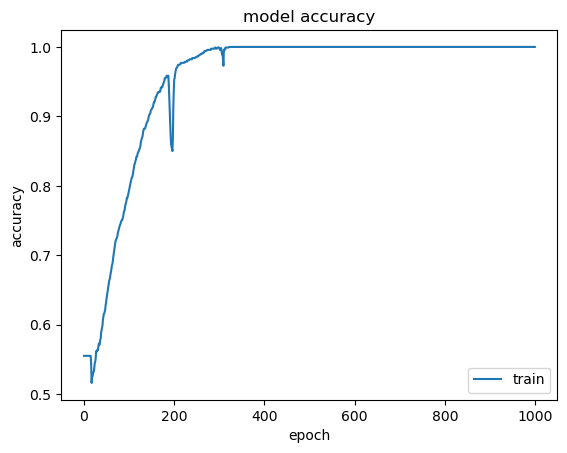

In [84]:
plt.plot(history1.history['acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train'], loc='lower right')
plt.show()

In [67]:
weight = model1.get_weights()
weight

[array([[ 0.8784882 ,  0.45998025,  0.60029125,  0.39259768,  0.25319326,
          0.44429922,  0.3429134 ,  0.77647233,  0.04512525,  0.8173852 ],
        [-0.11234418,  0.39238107,  0.26433387,  0.2562321 ,  0.9210362 ,
          0.30542445, -0.08641834,  0.22499056,  0.08440401,  0.47446668],
        [ 0.9529772 , -0.08738673,  1.128084  ,  1.0813297 ,  1.1320041 ,
          1.2444538 ,  1.106917  ,  0.59239364,  1.0934411 ,  0.98590803],
        [ 0.2836461 ,  0.5612243 ,  0.77992636, -0.02530735,  0.52226037,
          0.7665489 ,  0.08047327, -0.10240364,  0.70571584,  0.63029844],
        [ 0.54782164,  0.3496172 ,  0.67724204,  0.26231503,  0.49316424,
          0.853624  ,  0.7121175 ,  0.49082944,  0.51192164,  0.4746084 ],
        [ 0.26804993,  0.8212038 ,  0.6811999 ,  0.8855073 ,  0.80169827,
         -0.03394146,  0.57580477,  0.17883635,  0.89235055,  0.60787797],
        [ 0.4328664 ,  0.23318706,  0.75222445,  0.3914609 ,  0.5482265 ,
          0.16288292,  0.2414869

In [68]:
for layer in model1.layers:
  print(layer.name)

embedding_layer_fin = model1.get_layer(name="Embedding1", index=None)
embedding_weights_fin = embedding_layer_fin.get_weights()[0]


Embedding1
Flatten1
Dense1


In [69]:
print("Embeddings: ",embedding_weights_fin)

Embeddings:  [[ 0.8784882   0.45998025  0.60029125  0.39259768  0.25319326  0.44429922
   0.3429134   0.77647233  0.04512525  0.8173852 ]
 [-0.11234418  0.39238107  0.26433387  0.2562321   0.9210362   0.30542445
  -0.08641834  0.22499056  0.08440401  0.47446668]
 [ 0.9529772  -0.08738673  1.128084    1.0813297   1.1320041   1.2444538
   1.106917    0.59239364  1.0934411   0.98590803]
 [ 0.2836461   0.5612243   0.77992636 -0.02530735  0.52226037  0.7665489
   0.08047327 -0.10240364  0.70571584  0.63029844]
 [ 0.54782164  0.3496172   0.67724204  0.26231503  0.49316424  0.853624
   0.7121175   0.49082944  0.51192164  0.4746084 ]
 [ 0.26804993  0.8212038   0.6811999   0.8855073   0.80169827 -0.03394146
   0.57580477  0.17883635  0.89235055  0.60787797]
 [ 0.4328664   0.23318706  0.75222445  0.3914609   0.5482265   0.16288292
   0.24148692  0.764319    0.341894    0.8253921 ]
 [ 0.81584716  0.7680412   0.09234846  0.67054963  0.45317551  0.3808478
   0.13585834  0.5323323  -0.13549148  0.88

#### Revison thel modelo despues de ser entrenado

In [70]:
model_final =  Sequential()
model_final.add(model1.layers[-3])
#model_initial.add(dense_layer)
model_final.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])
print(model_final.summary())

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Embedding1 (Embedding)      (None, 20, 10)            720       
                                                                 
Total params: 720
Trainable params: 720
Non-trainable params: 0
_________________________________________________________________
None


### Contour plotting

In [ ]:
#n_input = 200
model1_1 = Model(inputs=model1.input, outputs=model1.layers[-3].output)
#model1_1.summary()

In [ ]:
skills_key = list(d_skills.keys())
complete = n_input - len(skills_key)% n_input
for i in range(complete):
    skills_key.append(0)
x_dim = int(len(skills_key)/(n_input))
re_skills = np.reshape(skills_key, (x_dim,n_input))

In [ ]:
output = model1_1.predict(re_skills)
shape_arr = output.shape
reshaped_output = np.reshape(output,((shape_arr[0]*shape_arr[1]),shape_arr[2] ))
#reshaped_output # this is the  reresentation of the 71 questions in 10-D 

In [ ]:
from sklearn.decomposition import PCA

# fit a 3-D PCA model to the vectors
words = pd.DataFrame(skills_key[0:20], columns =['word']) # Tengo que pomner lso nombre sd elas preguntas que van a ser codificadas aqui:
vectors = reshaped_output[0:20,:] #  
pca = PCA(n_components=3)
PCA_result = pca.fit_transform(vectors)

PCA_result = pd.DataFrame(PCA_result)
PCA_result['x'] = PCA_result.iloc[0:, 0]
PCA_result['y'] = PCA_result.iloc[0:, 1]
PCA_result['z'] = PCA_result.iloc[0:, 2]

PCA_final = pd.merge(words, PCA_result, left_index = True, right_index=True)
PCA_final = PCA_final[['word','x','y','z']]

In [ ]:
Z = PCA_final.pivot_table(index='x', columns='y', values='z').T.values
Z = np.nan_to_num(Z, copy=True, nan=0.0)

X_unique = np.sort(PCA_final.x.unique())
Y_unique = np.sort(PCA_final.y.unique())
X, Y = np.meshgrid(X_unique, Y_unique)

# generate a contour plot
import matplotlib.pyplot as plt

#plt.figure(figsize=(14,9))
plt.contourf(X, Y, Z, 1000, cmap='Blues')

# loop through to annotate multiple datapoints
for i in range(PCA_final.shape[0]):
    plt.annotate(PCA_final.word.tolist()[i], (PCA_final.x.tolist()[i], PCA_final.y.tolist()[i]))

plt.tight_layout()
plt.title('Contour plot for the first 20 embeddings')
plt.xlabel('Axis 1')
plt.ylabel('Axis 2')
plt.colorbar()
name = 'contour_plot_' +str(n_epoch) +'_'+ str(n_input)  + '.png'
plt.savefig(name)
plt.show()

### 2-D plot

In [66]:
#n_input = 80
model1_1 = Model(inputs=model1.input, outputs=model1.layers[-3].output)

In [67]:
skills_key = list(d_skills.keys())
complete = n_input - len(skills_key)% n_input
for i in range(complete):
    skills_key.append(0)
x_dim = int(len(skills_key)/(n_input))
re_skills = np.reshape(skills_key, (x_dim,n_input))

In [68]:
output = model1_1.predict(re_skills)
shape_arr = output.shape
reshaped_output = np.reshape(output,((shape_arr[0]*shape_arr[1]),shape_arr[2] ))
#reshaped_output # this is the  reresentation of the 71 questions in 10-D 

1/1 [==============================] - 0s 61ms/step


In [ ]:
#from sklearn.decomposition import PCA
words = pd.DataFrame(skills_key[0:20], columns =['word']) # Tengo que pomner lso nombre sd elas preguntas que van a ser codificadas aqui:
vectors = reshaped_output[0:20,:] #  
vectors0 = reshaped_output0[0:20,:] #  
pca = PCA(n_components=2)
result = pca.fit_transform(vectors)
result0 = pca.fit_transform(vectors0)
X = result[:, 0]
Y = result[:, 1]

X0 = result0[:, 0]
Y0 = result0[:, 1]

fig, ax = plt.subplots()
ax.scatter(X, Y)

#fig0, ax0 = plt.subplots()
ax.scatter(X0, Y0)

for i, txt in enumerate(labels):
    ax.annotate(txt, (X[i]+0.05, Y[i]+0.05),(X[i]+ 0.02, Y[i]-0.05), fontsize=5)
    
for i, txt in enumerate(labels):
    ax0.annotate(txt, (X0[i], Y0[i]),(X0[i]+ 0.02, Y0[i]-0.05), fontsize=5)


plt.xlabel('Axis 1')
plt.ylabel('Axis 2')
plt.title('Question2Vector 2-D plot of embeding ')
name = 'scatter_plot_' +str(n_epoch) +'_'+ str(n_input)  + '.png'
plt.savefig(name)
plt.show()

# Model 2

### Model trainning , accuracy and loss graphs

In this model make, sure to set the  variable **n_input** = 40 

In [69]:
# define generator, consider the previos 20 answers, number of timesteps
n_input = 40

In [70]:
#####jolunavi: the total number of questions are 1261
n_interactions = 1260 #len(preguntas)
batch_s = n_interactions - n_input
train = preguntas[:n_interactions]
train_y = respuestas[n_input:n_interactions] #se toman desde la respuesta 21 porque las preimeras 20 preguntas ayudan a producir la respuesta 21

In [71]:
n_features = 1 # in this particular case it might be 2; question and answer, however we concider only the question
generator = TimeseriesGenerator(train, train, length=n_input, batch_size=batch_s)
X,y = generator[0]
padded_reviews = pad_sequences(X, maxlen=n_input, padding='post')

In [72]:
model2 = Sequential()
embedding_layer = Embedding(VOCAB_SIZE, 10, input_length=n_input)
model2.add(embedding_layer)
model2.add(Flatten())
model2.add(Dense(1, activation='sigmoid'))
model2.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])
history2 = model2.fit(padded_reviews, train_y, epochs=n_epoch, verbose=0)

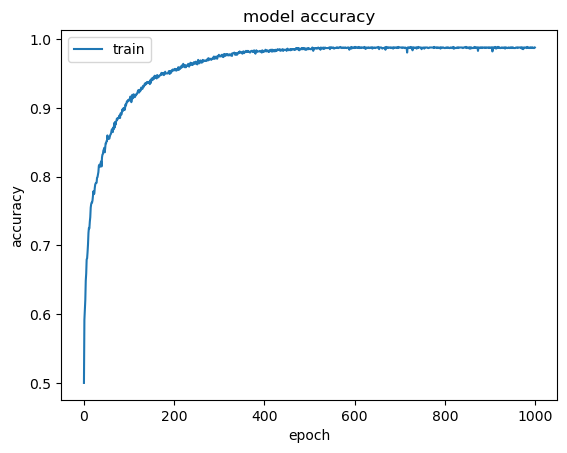

In [73]:
plt.plot(history2.history['acc'])
#plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper left')
plt.show()

### Contour plotting

In [ ]:
#n_input = 40
model2_1 = Model(inputs=model2.input, outputs=model2.layers[-3].output)

In [ ]:
skills_key = list(d_skills.keys())
complete = n_input - len(skills_key)% n_input
for i in range(complete):
    skills_key.append(0)
x_dim = int(len(skills_key)/(n_input))
re_skills = np.reshape(skills_key, (x_dim,n_input))

In [ ]:
output = model2_1.predict(re_skills)
shape_arr = output.shape
reshaped_output = np.reshape(output,((shape_arr[0]*shape_arr[1]),shape_arr[2] ))
#reshaped_output # this is the  reresentation of the 71 questions in 10-D 

In [ ]:
from sklearn.decomposition import PCA

# fit a 3-D PCA model to the vectors
words = pd.DataFrame(skills_key[0:20], columns =['word']) # Tengo que pomner lso nombre sd elas preguntas que van a ser codificadas aqui:
vectors = reshaped_output[0:20,:] #  
pca = PCA(n_components=3)
PCA_result = pca.fit_transform(vectors)

PCA_result = pd.DataFrame(PCA_result)
PCA_result['x'] = PCA_result.iloc[0:, 0]
PCA_result['y'] = PCA_result.iloc[0:, 1]
PCA_result['z'] = PCA_result.iloc[0:, 2]

PCA_final = pd.merge(words, PCA_result, left_index = True, right_index=True)
PCA_final = PCA_final[['word','x','y','z']]

In [ ]:
Z = PCA_final.pivot_table(index='x', columns='y', values='z').T.values
Z = np.nan_to_num(Z, copy=True, nan=0.0)

X_unique = np.sort(PCA_final.x.unique())
Y_unique = np.sort(PCA_final.y.unique())
X, Y = np.meshgrid(X_unique, Y_unique)

# generate a contour plot
import matplotlib.pyplot as plt

plt.figure(figsize=(20,12))
plt.contourf(X, Y, Z, 1000, cmap='Blues')

# loop through to annotate multiple datapoints
for i in range(PCA_final.shape[0]):
    plt.annotate(PCA_final.word.tolist()[i], (PCA_final.x.tolist()[i], PCA_final.y.tolist()[i]))

plt.tight_layout()
plt.title('contour plot for the first 20 embeddings')
plt.colorbar()
plt.savefig('contour_plot_40.png')
plt.show()

# Model 3

### Model trainning , accuracy and loss graphs

In this model make, sure to set the  variable **n_input** = 60 

In [74]:
# define generator, consider the previos 20 answers, number of timesteps
n_input = 200

In [75]:
#####jolunavi: the total number of questions are 1261
n_interactions = 1260 #len(preguntas)
batch_s = n_interactions - n_input
train = preguntas[:n_interactions]
train_y = respuestas[n_input:n_interactions] #se toman desde la respuesta 21 porque las preimeras 20 preguntas ayudan a producir la respuesta 21

In [76]:
n_features = 1 # in this particular case it might be 2; question and answer, however we concider only the question
generator = TimeseriesGenerator(train, train, length=n_input, batch_size=batch_s)
X,y = generator[0]
padded_reviews = pad_sequences(X, maxlen=n_input, padding='post')

In [77]:
model3 = Sequential()
embedding_layer = Embedding(VOCAB_SIZE, 10, input_length=n_input)
model3.add(embedding_layer)
model3.add(Flatten())
model3.add(Dense(1, activation='sigmoid'))
model3.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])
history3 = model3.fit(padded_reviews, train_y, epochs=n_epoch, verbose=0)

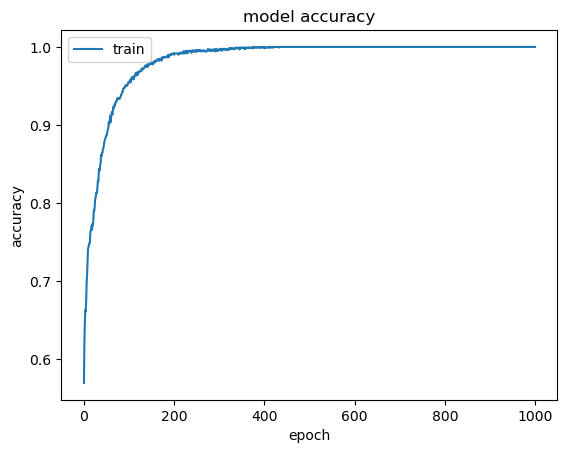

In [78]:
plt.plot(history3.history['acc'])
#plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper left')
plt.show()

### Contour plotting

In [ ]:
n_input = 60
model3_1 = Model(inputs=model3.input, outputs=model3.layers[-3].output)

In [ ]:
skills_key = list(d_skills.keys())
complete = n_input - len(skills_key)% n_input
for i in range(complete):
    skills_key.append(0)
x_dim = int(len(skills_key)/(n_input))
re_skills = np.reshape(skills_key, (x_dim,n_input))

In [ ]:
output = model3_1.predict(re_skills)
shape_arr = output.shape
reshaped_output = np.reshape(output,((shape_arr[0]*shape_arr[1]),shape_arr[2] ))
#reshaped_output # this is the  reresentation of the 71 questions in 10-D 

In [ ]:
from sklearn.decomposition import PCA

# fit a 3-D PCA model to the vectors
words = pd.DataFrame(skills_key[0:20], columns =['word']) # Tengo que pomner lso nombre sd elas preguntas que van a ser codificadas aqui:
vectors = reshaped_output[0:20,:] #  
pca = PCA(n_components=3)
PCA_result = pca.fit_transform(vectors)

PCA_result = pd.DataFrame(PCA_result)
PCA_result['x'] = PCA_result.iloc[0:, 0]
PCA_result['y'] = PCA_result.iloc[0:, 1]
PCA_result['z'] = PCA_result.iloc[0:, 2]

PCA_final = pd.merge(words, PCA_result, left_index = True, right_index=True)
PCA_final = PCA_final[['word','x','y','z']]

In [ ]:
Z = PCA_final.pivot_table(index='x', columns='y', values='z').T.values
Z = np.nan_to_num(Z, copy=True, nan=0.0)

X_unique = np.sort(PCA_final.x.unique())
Y_unique = np.sort(PCA_final.y.unique())
X, Y = np.meshgrid(X_unique, Y_unique)

# generate a contour plot
import matplotlib.pyplot as plt

#plt.figure(figsize=(14,9))
plt.contourf(X, Y, Z, 1000, cmap='Blues')

# loop through to annotate multiple datapoints
for i in range(PCA_final.shape[0]):
    plt.annotate(PCA_final.word.tolist()[i], (PCA_final.x.tolist()[i], PCA_final.y.tolist()[i]))

plt.tight_layout()
plt.title('contour plot for the first 60 embeddings')
plt.colorbar()
plt.savefig('contour_plot_60.png')
plt.show()

# Model 4


### Model trainning , accuracy and loss graphs

In this model make, sure to set the  variable **n_input** = 80 

In [79]:
# define generator, consider the previos 80 answers, number of timesteps
n_input = 500

In [80]:
#####jolunavi: the total number of questions are 1261
n_interactions = 1260 #len(preguntas)
batch_s = n_interactions - n_input
train = preguntas[:n_interactions]
train_y = respuestas[n_input:n_interactions] #se toman desde la respuesta 21 porque las preimeras 20 preguntas ayudan a producir la respuesta 21

In [81]:
n_features = 1 # in this particular case it might be 2; question and answer, however we concider only the question
generator = TimeseriesGenerator(train, train, length=n_input, batch_size=batch_s)
X,y = generator[0]
padded_reviews = pad_sequences(X, maxlen=n_input, padding='post')

In [82]:
model4 = Sequential()
embedding_layer = Embedding(VOCAB_SIZE, 10, input_length=n_input)
model4.add(embedding_layer)
model4.add(Flatten())
model4.add(Dense(1, activation='sigmoid'))
model4.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])
history4 = model4.fit(padded_reviews, train_y, epochs=n_epoch, verbose=0)

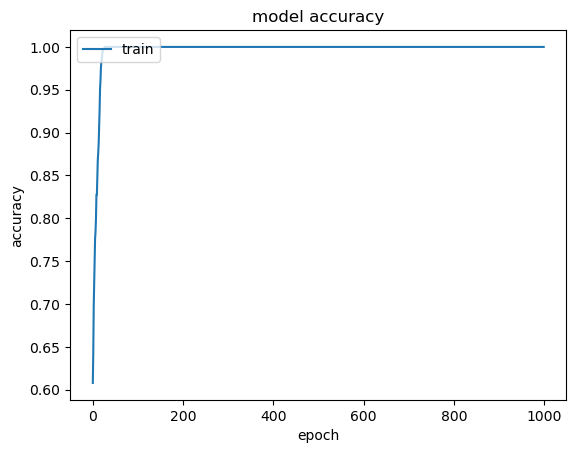

In [83]:
plt.plot(history4.history['acc'])
#plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper left')
plt.show()

### Contour plotting

In [ ]:
n_input = 80
model4_1 = Model(inputs=model4.input, outputs=model4.layers[-3].output)

In [ ]:
skills_key = list(d_skills.keys())
complete = n_input - len(skills_key)% n_input
for i in range(complete):
    skills_key.append(0)
x_dim = int(len(skills_key)/(n_input))
re_skills = np.reshape(skills_key, (x_dim,n_input))

In [ ]:
output = model4_1.predict(re_skills)
shape_arr = output.shape
reshaped_output = np.reshape(output,((shape_arr[0]*shape_arr[1]),shape_arr[2] ))
#reshaped_output # this is the  reresentation of the 71 questions in 10-D 

In [ ]:
from sklearn.decomposition import PCA

# fit a 3-D PCA model to the vectors
words = pd.DataFrame(skills_key[0:20], columns =['word']) # Tengo que pomner lso nombre sd elas preguntas que van a ser codificadas aqui:
vectors = reshaped_output[0:20,:] #  
pca = PCA(n_components=3)
PCA_result = pca.fit_transform(vectors)

PCA_result = pd.DataFrame(PCA_result)
PCA_result['x'] = PCA_result.iloc[0:, 0]
PCA_result['y'] = PCA_result.iloc[0:, 1]
PCA_result['z'] = PCA_result.iloc[0:, 2]

PCA_final = pd.merge(words, PCA_result, left_index = True, right_index=True)
PCA_final = PCA_final[['word','x','y','z']]

In [ ]:
Z = PCA_final.pivot_table(index='x', columns='y', values='z').T.values
Z = np.nan_to_num(Z, copy=True, nan=0.0)

X_unique = np.sort(PCA_final.x.unique())
Y_unique = np.sort(PCA_final.y.unique())
X, Y = np.meshgrid(X_unique, Y_unique)

# generate a contour plot
import matplotlib.pyplot as plt

#plt.figure(figsize=(14,9))
plt.contourf(X, Y, Z, 1000, cmap='Blues')

# loop through to annotate multiple datapoints
for i in range(PCA_final.shape[0]):
    plt.annotate(PCA_final.word.tolist()[i], (PCA_final.x.tolist()[i], PCA_final.y.tolist()[i]))

plt.tight_layout()
plt.title('contour plot for the first 80 embeddings')
plt.colorbar()
plt.savefig('contour_plot_80.png')
plt.show()

### 3-D plot

In [ ]:
import plotly
import numpy as np
import plotly.graph_objs as go
from sklearn.decomposition import PCA

input_word = '1,7,15'
user_input = [x.strip() for x in input_word.split(',')]
result_word = []

def display_pca_scatterplot_3D( user_input=None, words=None, label=None, color_map=None, topn=5, sample=10):

    words = pd.DataFrame(skills_key[0:20], columns =['word']) # Tengo que pomner lso nombre sd elas preguntas que van a ser codificadas aqui:
    word_vectors = reshaped_output[0:20,:] #  
    
    three_dim = PCA(random_state=0).fit_transform(word_vectors)[:,:3]
    # For 2D, change the three_dim variable into something like two_dim like the following:
    # two_dim = PCA(random_state=0).fit_transform(word_vectors)[:,:2]

    data = []
    count = 0
    
    for i in range (len(user_input)):

                trace = go.Scatter3d(
                    x = three_dim[count:count+topn,0], 
                    y = three_dim[count:count+topn,1],  
                    z = three_dim[count:count+topn,2],
                    text = words[count:count+topn],
                    name = user_input[i],
                    textposition = "top center",
                    textfont_size = 20,
                    mode = 'markers+text',
                    marker = {
                        'size': 10,
                        'opacity': 0.8,
                        'color': 2
                    }
       
                )
                
                # For 2D, instead of using go.Scatter3d, we need to use go.Scatter and delete the z variable. Also, instead of using
                # variable three_dim, use the variable that we have declared earlier (e.g two_dim)
            
                data.append(trace)
                count = count+topn

    trace_input = go.Scatter3d(
                    x = three_dim[count:,0], 
                    y = three_dim[count:,1],  
                    z = three_dim[count:,2],
                    text = words[count:],
                    name = 'input words',
                    textposition = "top center",
                    textfont_size = 20,
                    mode = 'markers+text',
                    marker = {
                        'size': 10,
                        'opacity': 1,
                        'color': 'black'
                    }
                    )

    # For 2D, instead of using go.Scatter3d, we need to use go.Scatter and delete the z variable.  Also, instead of using
    # variable three_dim, use the variable that we have declared earlier (e.g two_dim)
            
    data.append(trace_input)
    
# Configure the layout

    layout = go.Layout(
        margin = {'l': 0, 'r': 0, 'b': 0, 't': 0},
        showlegend=True,
        legend=dict(
        x=1,
        y=0.5,
        font=dict(
            family="Courier New",
            size=25,
            color="black"
        )),
        font = dict(
            family = " Courier New ",
            size = 15),
        autosize = False,
        width = 1000,
        height = 1000
        )


    plot_figure = go.Figure(data = data, layout = layout)
    plot_figure.show()
    
display_pca_scatterplot_3D( user_input)

# 4-model summary plot

### Joint plot

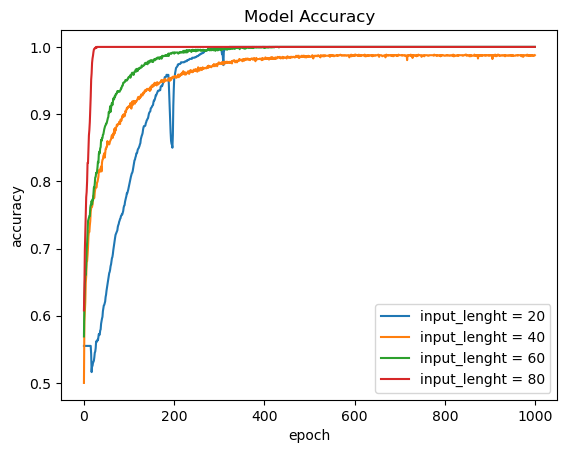

In [84]:
plt.plot(history1.history['acc'])
plt.plot(history2.history['acc'])
plt.plot(history3.history['acc'])
plt.plot(history4.history['acc'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['input_lenght = 20', 'input_lenght = 40', 'input_lenght = 60', 'input_lenght = 80'], loc='lower right')
plt.savefig('model_accuracy.png')
plt.show()

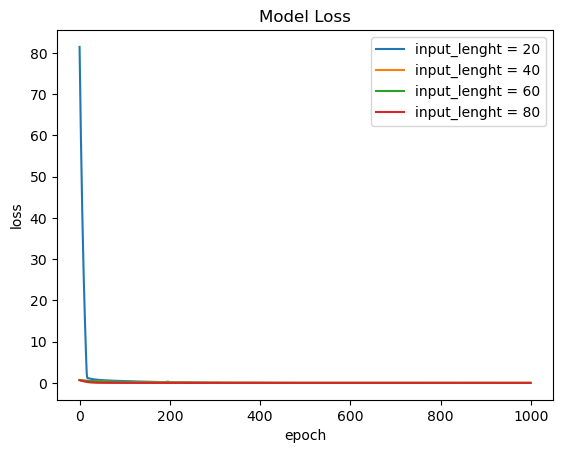

In [85]:
plt.plot(history1.history['loss'])
plt.plot(history2.history['loss'])
plt.plot(history3.history['loss'])
plt.plot(history4.history['loss'])
plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['input_lenght = 20', 'input_lenght = 40', 'input_lenght = 60', 'input_lenght = 80'], loc='upper right')
plt.savefig('model_loss.png')
plt.show()

### Similarity calculation

In [ ]:
# 22	Addition Whole Numbers
# 20	Addition and Subtraction Integers
# 21	Multiplication and Division Integers

In [ ]:
A = np.array(dictionary[22])
B = np.array(dictionary[20])
C = np.array(dictionary[21])

In [ ]:
from numpy.linalg import norm
# compute cosine similarity
cosine = np.dot(A,B)/(norm(A)*norm(B))
print("Cosine Similarity:", cosine)

In [ ]:
# compute cosine similarity
cosine = np.dot(A,C)/(norm(A)*norm(C))
print("Cosine Similarity:", cosine)

In [ ]:
# compute cosine similarity
cosine = np.dot(B,C)/(norm(B)*norm(C))
print("Cosine Similarity:", cosine)

The following code is related to using the dataloader function :


In [ ]:
model = Sequential()
embedding_layer = Embedding(VOCAB_SIZE, 10, input_length=20)
model.add(embedding_layer)
model.add(Flatten())
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])

# Experimental Model

### Model trainning , accuracy and loss graphs

In this model make, sure to set the  variable **n_input** = 80 

In [ ]:
# define generator, consider the previos 20 answers, number of timesteps
n_input = 500

In [ ]:
#####jolunavi: the total number of questions are 1261
n_interactions = 1260 #len(preguntas)
batch_s = n_interactions - n_input
train = preguntas[:n_interactions]
train_y = respuestas[n_input:n_interactions] #se toman desde la respuesta 21 porque las preimeras 20 preguntas ayudan a producir la respuesta 21

In [ ]:
n_features = 1 # in this particular case it might be 2; question and answer, however we concider only the question
generator = TimeseriesGenerator(train, train, length=n_input, batch_size=batch_s)
X,y = generator[0]
padded_reviews = pad_sequences(X, maxlen=n_input, padding='post')

In [ ]:
model4 = Sequential()
embedding_layer = Embedding(VOCAB_SIZE, 10, input_length=n_input)
model4.add(embedding_layer)
model4.add(Flatten())
model4.add(Dense(1, activation='sigmoid'))
model4.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])
history4 = model4.fit(padded_reviews, train_y, epochs=n_epoch, verbose=1)

In [ ]:
for e in range(epochs):
    sys.stdout.write('\r')

    for X, y in data.next_batch():
        model.fit(X, y, nb_epoch=1, batch_size=data.batch_size, verbose=0)

    # print loss and accuracy

    # the exact output you're looking for:
    sys.stdout.write("[%-60s] %d%%" % ('='*(60*(e+1)/10), (100*(e+1)/10)))
    sys.stdout.flush()
    sys.stdout.write(", epoch %d"% (e+1))
    sys.stdout.flush()

In [ ]:
plt.plot(history4.history['acc'])
#plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train'], loc='lower right')
plt.show()

### 2-D plotting

In [ ]:
n_input = 80
model4_1 = Model(inputs=model4.input, outputs=model4.layers[-3].output)

In [ ]:
skills_key = list(d_skills.keys())
complete = n_input - len(skills_key)% n_input
for i in range(complete):
    skills_key.append(0)
x_dim = int(len(skills_key)/(n_input))
re_skills = np.reshape(skills_key, (x_dim,n_input))

In [ ]:
output = model4_1.predict(re_skills)
shape_arr = output.shape
reshaped_output = np.reshape(output,((shape_arr[0]*shape_arr[1]),shape_arr[2] ))
#reshaped_output # this is the  reresentation of the 71 questions in 10-D 

In [ ]:
#from sklearn.decomposition import PCA
words = pd.DataFrame(skills_key[0:20], columns =['word']) # Tengo que pomner lso nombre sd elas preguntas que van a ser codificadas aqui:
vectors = reshaped_output[0:20,:] #  

pca = PCA(n_components=2)
result = pca.fit_transform(vectors)
X = result[:, 0]
Y = result[:, 1]

fig, ax = plt.subplots()
ax.scatter(X, Y)

for i, txt in enumerate(labels):
    ax.annotate(txt, (X[i], Y[i]),(X[i]+ 0.02, Y[i]-0.05), fontsize=7)

plt.xlabel('Axis 1')
plt.ylabel('Axis 2')
plt.title('Question2Vector 2-D plot of embeding ')
name = 'scatter_plot_' +n_input +'_'+ n_input  + '.png')
plt.savefig(name)
plt.show()